In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/Flora/데이터수집/CW01_2022_01_05_12_31_01.csv')

In [2]:
axis1 = df['Axis_1']
axis2 = df['Axis_2']
axis3 = df['Axis_3']
sound = df['Sound']

In [3]:
axis1.head()

0    0.513341
1   -0.107790
2   -0.011686
3    0.131160
4    0.012762
Name: Axis_1, dtype: float64

In [4]:
samplerate = 25600 #Frequecy in Hz

In [5]:
def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    for i in axis1:
        amplitude = i
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(2.5, 1)

In [6]:
print(np.max(a_wave))
print(np.min(a_wave))

0.1423926115873533
-0.14239261373192816


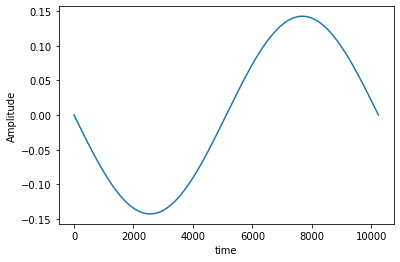

In [13]:
import matplotlib.pyplot as plt
plt.plot(a_wave[0:int(25600/2.5)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

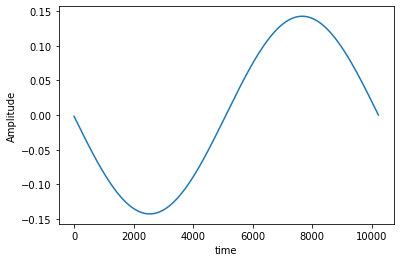

In [14]:
import matplotlib.pyplot as plt
plt.plot(a_wave[20:int(25600/2.5)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

In [15]:
import math
import wave
import struct

freq = 0.4
data_size = 40000*4
fname = "WaveTest.wav"
frate = 25600
amp = 30000
# for i in axis1:
#     amp.append(i)
    
sine_list_x = []
for x in range(data_size):
    sine_list_x.append(math.sin(2*math.pi*freq*(x/frate)))

wav_file = wave.open(fname, "w")

nchannels = 1
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, framerate, nframes,
    comptype, compname))


for s in sine_list_x:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp/2)))

wav_file.close()
import os
os.startfile(fname)

In [16]:
import wave
import struct

import numpy as np
import matplotlib.pyplot as plt

fname = ".\WaveTest.wav"
wav_file = wave.open(fname, "r")



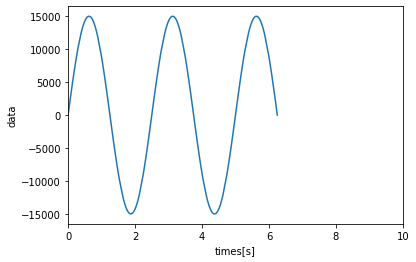

In [17]:
framerate = float(wav_file.getframerate())
nframes = wav_file.getnframes()

time = np.arange(0, nframes/framerate, 1/framerate)
data = []
for i in range(0,nframes):
    waveData = wav_file.readframes(1)
    data.append(struct.unpack("<h", waveData))

wav_file.close()

plt.plot(time, data)
plt.xlabel("times[s]")
plt.ylabel("data")
plt.xlim(0, 10)
plt.show()

In [18]:
from scipy.io import wavfile
import IPython.display as ipd
fs, x = wavfile.read("C:/Users/Flora/데이터수집/WaveTest.wav")

print('입력신호')
display(ipd.Audio(x, rate = fs))

입력신호
